<a href="https://www.kaggle.com/code/mohammedramadan2023/mnist-softmax?scriptVersionId=164721551" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-data-for-digit-recognation/t10k-images-idx3-ubyte.gz
/kaggle/input/mnist-data-for-digit-recognation/train-images.idx3-ubyte
/kaggle/input/mnist-data-for-digit-recognation/t10k-labels-idx1-ubyte.gz
/kaggle/input/mnist-data-for-digit-recognation/train-labels-idx1-ubyte.gz
/kaggle/input/mnist-data-for-digit-recognation/t10k-labels.idx1-ubyte
/kaggle/input/mnist-data-for-digit-recognation/t10k-images.idx3-ubyte
/kaggle/input/mnist-data-for-digit-recognation/train-labels.idx1-ubyte
/kaggle/input/mnist-data-for-digit-recognation/train-images-idx3-ubyte.gz


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import os

2024-02-28 15:38:26.477972: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 15:38:26.478098: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 15:38:26.628194: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/opt/conda/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

# Loading Data

In [5]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain, xtest = xtrain / 255.0, xtest / 255.0

11490434/11490434 [==============================] - 0s 0us/step


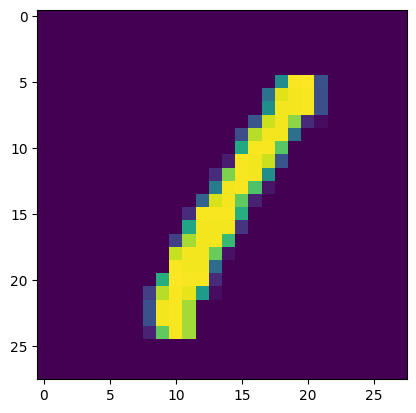

In [6]:
plt.imshow(xtrain[3])

# Building the model

In [7]:
# model = Sequential([
#     Dense(units = 50, activation = 'relu', input_shape=(28, 28)),
#     Dense(units = 50, activation = 'relu'),
#     Dense(units = 10, activation = 'softmax')
# ])
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(units=25, activation='sigmoid'),
    Dense(units=15, activation='sigmoid'),
    Dense(units=10)  # No activation function here
])

In [8]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [9]:
# model.compile(optimizer='adam',
#               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 1e-3),
             loss= SparseCategoricalCrossentropy(from_logits= True), metrics= ['accuracy'])

In [10]:
model.fit(xtrain, ytrain, epochs= 100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9727 - accuracy: 0.7824
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3525 - accuracy: 0.9132
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2478 - accuracy: 0.9336
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1997 - accuracy: 0.9457
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1710 - accuracy: 0.9532
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1519 - accuracy: 0.9576
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1372 - accuracy: 0.9611
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1257 - accuracy: 0.9646
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1162 - accuracy: 0.9672
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

In [11]:
logist = model(xtrain)

In [12]:
f_x = tf.nn.softmax(logist)

In [13]:
f_x

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[1.85143081e-11, 1.41108195e-10, 1.02976861e-12, ...,
        6.84874379e-09, 4.23747881e-09, 2.10567759e-05],
       [9.99999821e-01, 1.88698877e-16, 1.16774066e-08, ...,
        9.49414880e-10, 3.53254208e-08, 7.26707269e-13],
       [8.98067221e-09, 1.14982295e-11, 8.11936296e-10, ...,
        6.14006632e-12, 6.58165319e-12, 2.61835709e-07],
       ...,
       [9.64225631e-15, 1.76122155e-11, 3.52433601e-17, ...,
        7.30870743e-16, 1.63781888e-09, 4.14888346e-09],
       [1.07459095e-06, 1.18515503e-10, 8.59094407e-10, ...,
        9.61678941e-15, 1.63063643e-08, 7.02862112e-14],
       [3.15507864e-09, 1.31988601e-10, 1.48927948e-09, ...,
        6.93100688e-08, 9.99996841e-01, 1.83579396e-09]], dtype=float32)>

In [14]:
val_loss, val_acc = model.evaluate(xtest, ytest)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2485 - accuracy: 0.9553
0.24847263097763062 0.955299973487854


In [15]:
predictions = model.predict(xtest)

313/313 [==============================] - 1s 1ms/step


In [16]:
predictions

array([[-10.013087  ,  -7.4376884 ,   0.0258345 , ...,  16.808805  ,
        -13.861269  ,  -8.393934  ],
       [ -3.2717535 ,  -4.749538  ,  11.00369   , ...,  -5.5966754 ,
         -6.720373  , -14.121196  ],
       [-20.033407  ,  14.433643  ,   0.18289751, ...,  -0.6753601 ,
        -10.773541  , -10.416946  ],
       ...,
       [ -6.546927  , -14.073008  , -10.039428  , ..., -11.649414  ,
         -8.78875   ,   0.708027  ],
       [ -6.8782306 , -11.300348  , -13.25985   , ..., -11.560464  ,
          1.3503983 ,  -9.228163  ],
       [ -1.6279112 ,  -8.902655  ,  -1.9921256 , ..., -16.712172  ,
         -5.9502106 , -14.106432  ]], dtype=float32)

In [17]:
model.predict([xtest])

313/313 [==============================] - 0s 1ms/step


array([[-10.013087  ,  -7.4376884 ,   0.0258345 , ...,  16.808805  ,
        -13.861269  ,  -8.393934  ],
       [ -3.2717535 ,  -4.749538  ,  11.00369   , ...,  -5.5966754 ,
         -6.720373  , -14.121196  ],
       [-20.033407  ,  14.433643  ,   0.18289751, ...,  -0.6753601 ,
        -10.773541  , -10.416946  ],
       ...,
       [ -6.546927  , -14.073008  , -10.039428  , ..., -11.649414  ,
         -8.78875   ,   0.708027  ],
       [ -6.8782306 , -11.300348  , -13.25985   , ..., -11.560464  ,
          1.3503983 ,  -9.228163  ],
       [ -1.6279112 ,  -8.902655  ,  -1.9921256 , ..., -16.712172  ,
         -5.9502106 , -14.106432  ]], dtype=float32)

In [18]:
print(np.argmax(predictions[100]))

6


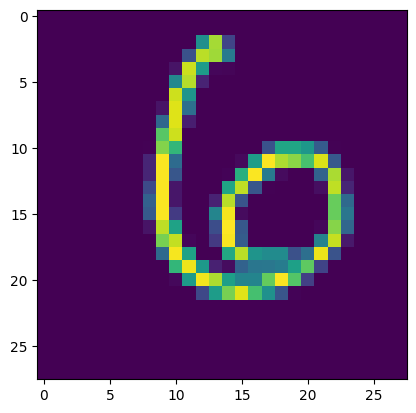

In [19]:
plt.imshow(xtest[100])
plt.show()

In [20]:
print(np.argmax(predictions[0]))

7


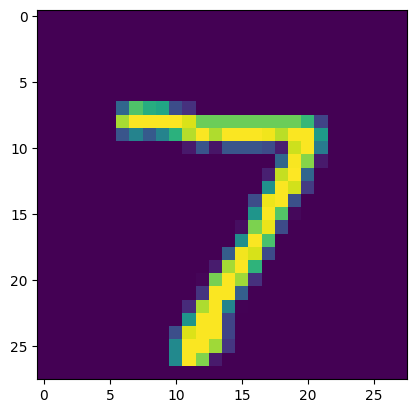

In [21]:
plt.imshow(xtest[0])
plt.show()